# ECGR 4105-001, Homework 3
## By Joshua Foster, 801268119

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

Problem 1

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.  

In [48]:
# Load the diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [49]:
# Importing modules to be used later
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
iterations = []

# Train the model over multiple iterations
n_iterations = 20
max_iter_range = np.linspace(10, 100, n_iterations, dtype=int)

for i in max_iter_range:
    model = LogisticRegression(random_state=0, max_iter=i)
    model.fit(X_train_scaled, y_train)

    # Calculate metrics
    y_train_pred_proba = model.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_accuracy = model.score(X_train_scaled, y_train)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    iterations.append(i)

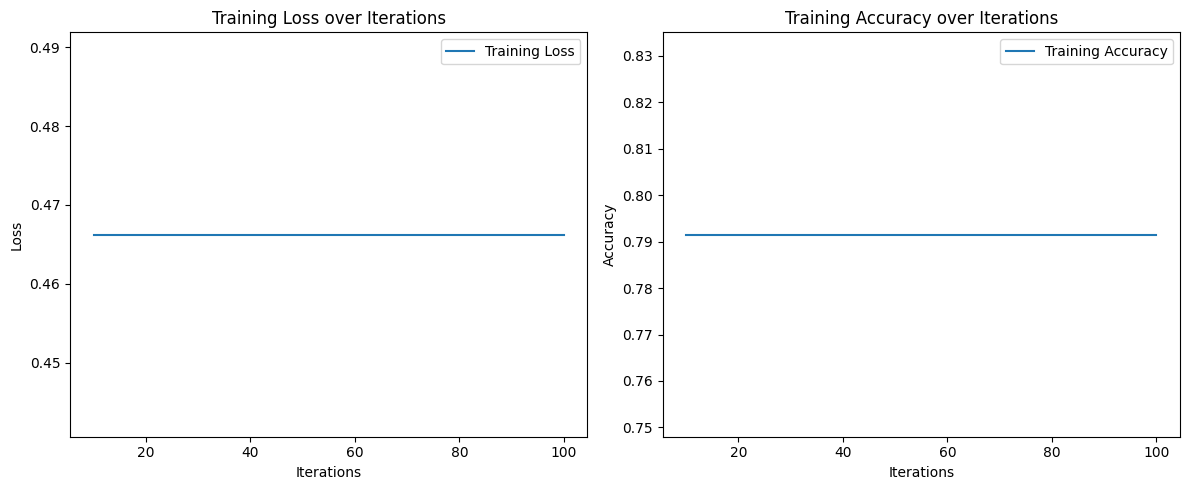

In [51]:

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iterations, train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.71
Precision: 0.61
Recall: 0.52
F1 Score: 0.56


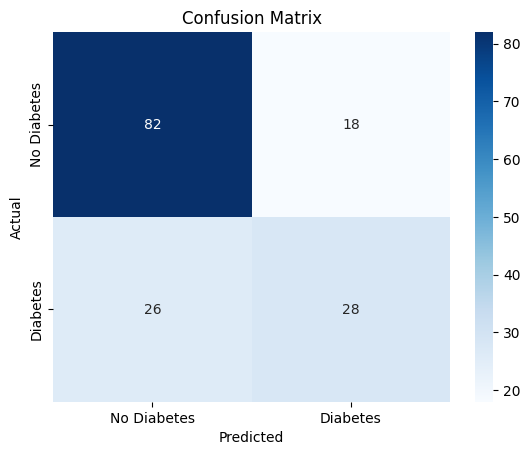

In [52]:
# Final model training and evaluation
final_model = LogisticRegression(random_state=0, max_iter=100)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Problem 2 

a. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, recall and F1 score. At the end, plot the confusion matrix representing your binary classifier.  

In [53]:
from sklearn import datasets 

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
iterations = []

# Train the model over multiple iterations
n_iterations = 20
max_iter_range = np.linspace(10, 20, n_iterations, dtype=int)

for i in max_iter_range:
    model = LogisticRegression(random_state=0, max_iter=n_iterations)
    model.fit(X_train_scaled, y_train)

    # Calculate metrics
    y_train_pred_proba = model.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_accuracy = model.score(X_train_scaled, y_train)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    iterations.append(i)

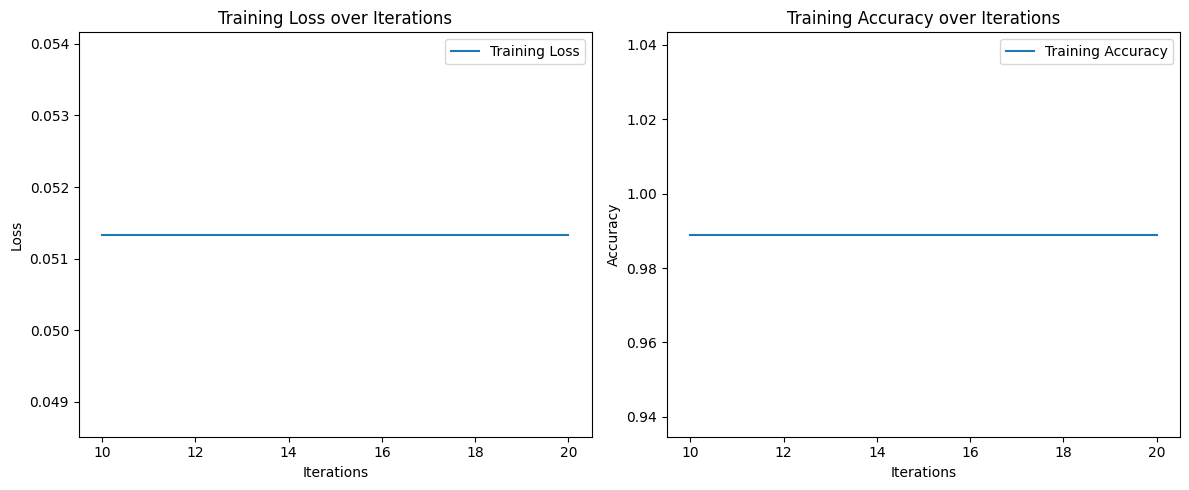

In [61]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iterations, train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


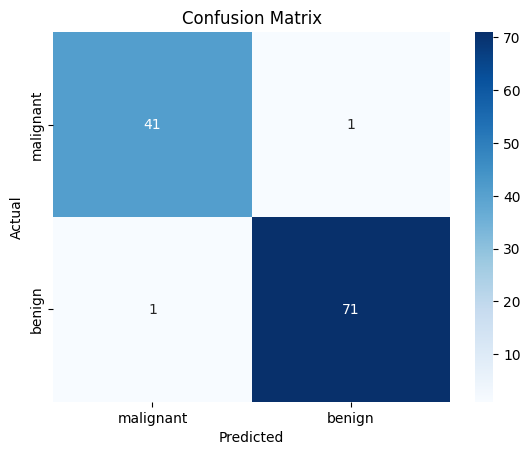

In [62]:
# Final model training and evaluation
final_model = LogisticRegression(random_state=0, max_iter=n_iterations)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

b.How about adding a weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results. 

In [58]:
# Add weight penalty and repeat training
penalty = 'l2'  # Using L2 regularization
C_values = [0.1, 1, 10]  # Different regularization strengths


Training with C=0.1 (Regularization Strength)


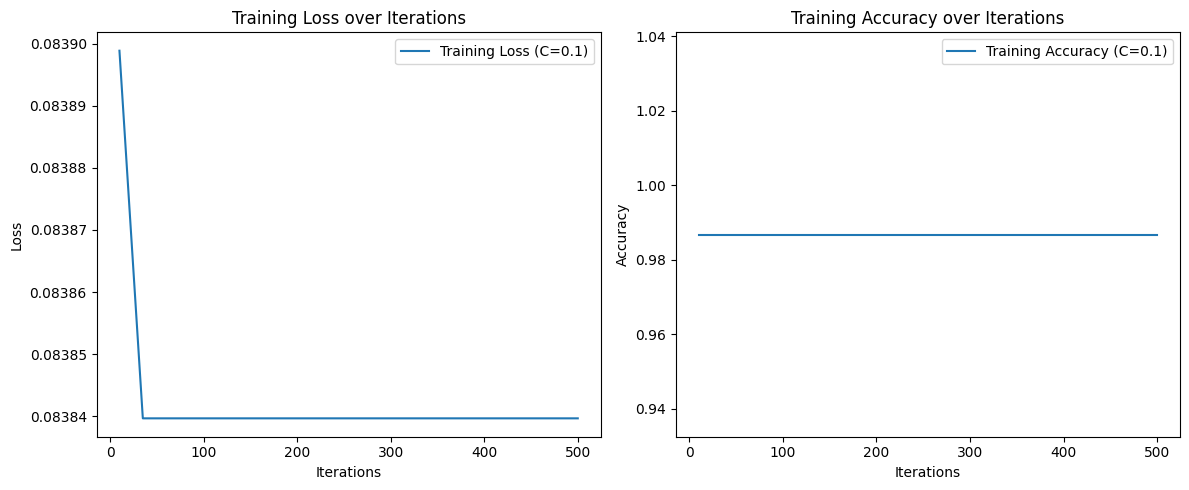

Results for C=0.1:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


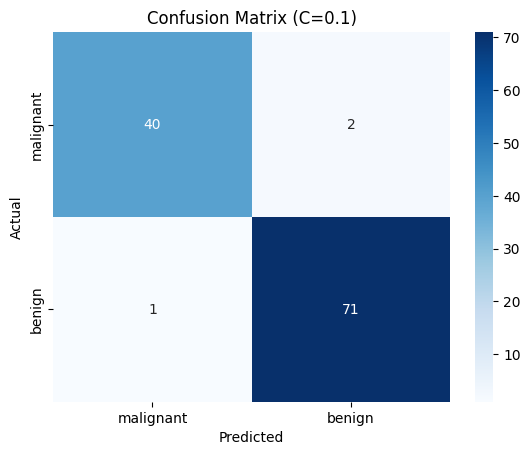

Training with C=1 (Regularization Strength)


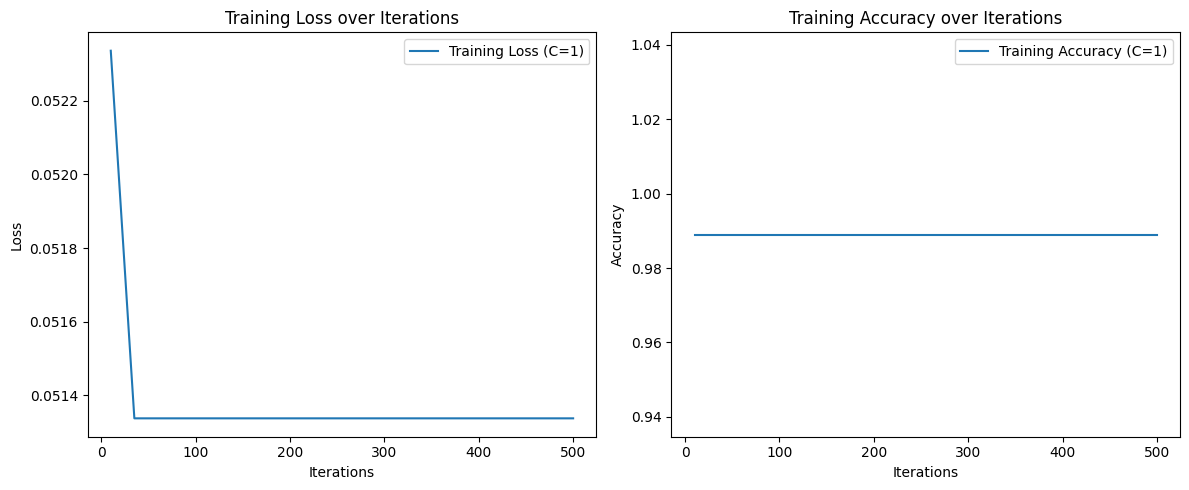

Results for C=1:
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


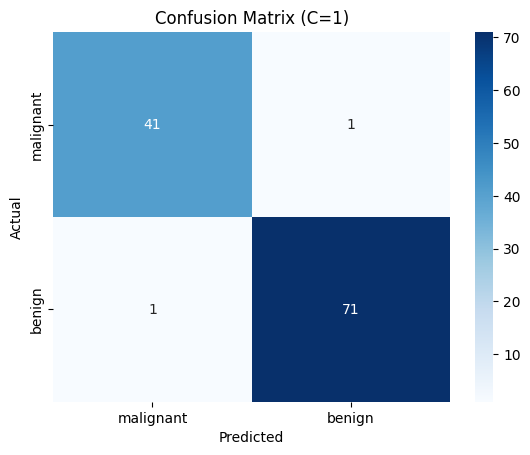

Training with C=10 (Regularization Strength)


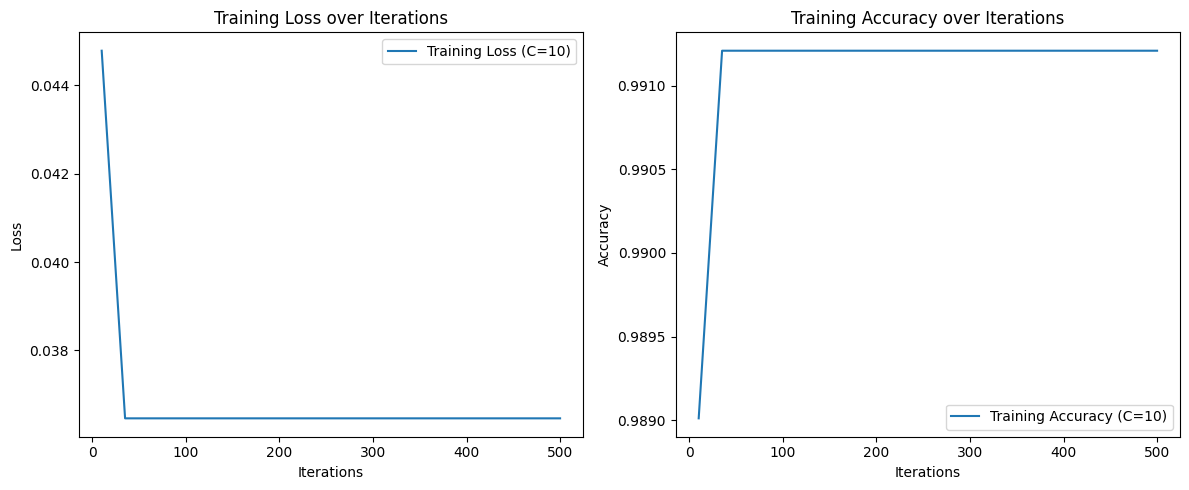

Results for C=10:
Accuracy: 0.96
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


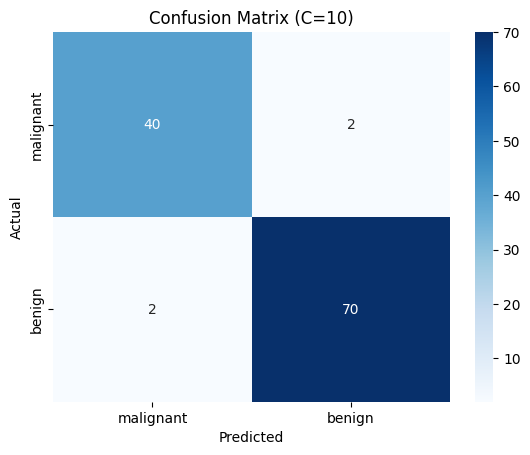

In [59]:

for C in C_values:
    print(f"Training with C={C} (Regularization Strength)")
    
    # Initialize lists to store metrics
    train_losses = []
    train_accuracies = []
    iterations = []

    for i in max_iter_range:
        model = LogisticRegression(random_state=0, max_iter=i, penalty=penalty, C=C, solver='lbfgs')
        model.fit(X_train_scaled, y_train)

        # Calculate metrics
        y_train_pred_proba = model.predict_proba(X_train_scaled)
        train_loss = log_loss(y_train, y_train_pred_proba)
        train_accuracy = model.score(X_train_scaled, y_train)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        iterations.append(i)

    # Plot training loss and accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(iterations, train_losses, label=f'Training Loss (C={C})')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss over Iterations')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(iterations, train_accuracies, label=f'Training Accuracy (C={C})')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy over Iterations')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Final model training and evaluation
    final_model = LogisticRegression(random_state=0, max_iter=100, penalty=penalty, C=C, solver='lbfgs')
    final_model.fit(X_train_scaled, y_train)

    y_pred = final_model.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Results for C={C}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.target_names, yticklabels=dataset.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (C={C})')
    plt.show()